Aqui se muestra que cuando se realiza un scatter plot entre dos variables (relacion funcional entre dos variables), no es independiente en que eje hay que hacer el bineo. Estas figuras son parte del Suplementary Information the On the physical mangitudes "On the physical origin of linguistic laws and lognormality in speech"

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def binear_datos(lista_x, lista_y, bins=50, log = True):
    """
    Dado una lista de par de puntos (X,Y) binea dando lugar a una lista equivalente
    pero de menor dimension. Sirve para eliminar el ruido, variaciones, etc.
    INPUT:
        lista_x (list, array): Lista de puntos de igual dimension que lista_y
        lista_y (list, array): Lista de puntos de igual dimension que lista_x
        bins (int): numero de bins a utilizar
        log (boolean): True-> bins logaritmico, False-> bins lineales
    OUTPUT:
        posiciones (array): Centro de gravedad del bin. lista de posiciones X
        frecuencia_media(array): Frecuencia pesada en los bins
    """
    # Definicion de los bins
    if log:
        bin_edges = np.logspace(np.log10(min(lista_x)), np.log10(max(lista_x)), bins)
    else:
         bin_edges = np.linspace(min(lista_x), max(lista_x), bins)

    diccionario = dict() # valor*posicion
    diccionario_frecs = dict()
    for indice_x, value_x in enumerate(lista_x):
        indice_caja = np.searchsorted(bin_edges, value_x)
        if indice_caja in diccionario:
            diccionario[indice_caja].append(lista_x[indice_x]*lista_y[indice_x])
            diccionario_frecs[indice_caja].append(lista_y[indice_x])
        else:
            diccionario[indice_caja] = list()
            diccionario_frecs[indice_caja] = list()
            diccionario[indice_caja].append(lista_x[indice_x]*lista_y[indice_x])
            diccionario_frecs[indice_caja].append(lista_y[indice_x])

    frecuencia_media = []
    for key, value in diccionario_frecs.items():
        if len(value) > 0:
            frecuencia_media.append(np.mean(value))
        elif len(value) == 0:
            frecuencia_media.append(0)

    posiciones = []
    #print(diccionario.items())
    for key, value in diccionario.items():
        
        if len(value) > 0:
            posiciones.append(np.sum(value)/np.sum(diccionario_frecs[key]))
        elif len(value) == 0:
            posiciones.append((bin_edges[key] + bin_edges[key+1])/2)

    return posiciones, frecuencia_media

# 1. Scatter plot sintetico entre dos variables 

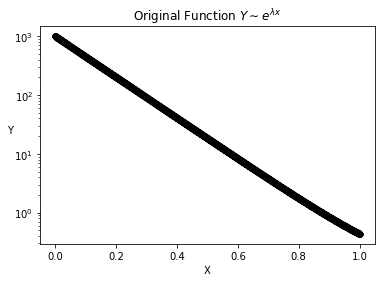

In [5]:
x = np.linspace(0, 1, 10000)
y = 0.1 + 1000*np.exp(-8*x)



f, ax = plt.subplots()
ax.plot(x, y, 'o', color="k", ms=5)
ax.set_yscale("log")
ax.set_xlabel("X")
ax.set_ylabel("Y", rotation=0)
ax.set_title("Original Function " + "$Y \sim e^{\lambda x}$")
f.savefig("resultados/Buckeye/1_LeyesLinguisticas/SI_7_Scatter1.pdf")

# 2. Se añade ruido sobre una de las variables

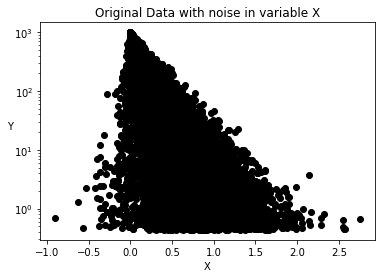

In [7]:
noise = np.random.normal(0, 3, len(x))

xruido = x + x*0.17*noise


f, ax = plt.subplots()
ax.plot(xruido, y, "o", color="k")
ax.set_yscale("log")
ax.set_xlabel("X")
ax.set_ylabel("Y", rotation=0)
ax.set_title("Original Data with noise in variable X")
f.savefig("resultados/Buckeye/1_LeyesLinguisticas/SI_8_Scatter2.pdf")

# 3. Bineamos sobre uno de los ejes para intentar eliminar el ruido
En este caso no conseguimos recuperar la funcion original


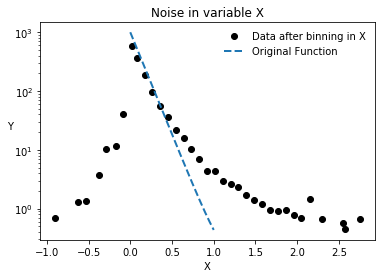

In [8]:
posx, freqy = binear_datos(xruido, y, bins=40, log = False)

f, ax = plt.subplots()
ax.plot(posx, freqy, "o", color="k", label="Data after binning in X")
ax.set_yscale("log")
ax.plot(x, y, "--", lw=2, label="Original Function")
ax.legend(frameon = False)
ax.set_xlabel("X")
ax.set_ylabel("Y", rotation=0)
ax.set_title("Noise in variable X")
f.savefig("resultados/Buckeye/1_LeyesLinguisticas/SI_9_Scatter3.pdf")

# 4. Bineamos sobre el otro eje.
En este caso recuperamos la funcion original

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


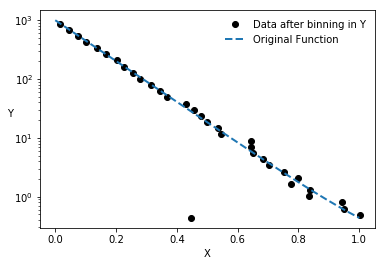

In [9]:
bin_y, bin_x  = binear_datos(y, xruido, log = True, bins =33)
f, ax = plt.subplots()

ax.plot(bin_x, bin_y, "o", color="k", label="Data after binning in Y")
ax.set_yscale("log")
ax.plot(x, y, "--", lw=2, label = "Original Function")
ax.legend(frameon = False)
ax.set_xlabel("X")
ax.set_ylabel("Y", rotation=0)
f.savefig("resultados/Buckeye/1_LeyesLinguisticas/SI_10_Scatter4.pdf")